# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

bservations:

Looking at the Latitude vs Temperature Plot, the temperature increases as the latitude approaches the equator. The northern hemisphere cities tend to be cooler as latitudes increase. There seem to be little to no correlation between the latitude vs humidity, latitude vs cloudiness, or latitude vs wind speeds.

For both northern and southern hemisphere, there are a strong correlation between the city latitude vs max temperature. The Linear regression model for the northern hemisphere plot has a r-value of -0.866 and 0.744 for the southern hemisphere. 

The linear regression model for the other attributes in both hemispheres: humidity, cloudiness, and windspeed have low r-values. The highest r-value of 0.211 for the humidity in northern half and lowest being 0.048 for the wind speed in the northern half as well. The regression models support the previous observations of low correlation between the latitude vs humidity, latitude vs cloudiness, or latitude vs wind speeds.


In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Build query URL

url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# empty lists for appending
city_data =[]
lat = []
long =[]
temp = []
hum=[]
cloud=[]
windspeed=[]
country =[]
dates=[]

#set counters
record_count = 1
set_count = 1


print("Beginning Data Retrieval")
print("-----------------------------")

#for loop

for city in cities:
    
    print(f'Processing Record {record_count} of set {set_count} |{city}')
    
    try:
        weather_response = requests.get(query_url + city).json()
        
        if record_count > 49:
            record_count = 1
            set_count += 1
        
        else:
            record_count +=1
         #print response  
#         print(json.dumps(weather_response, indent=4, sort_keys=True))
        
        #latitude
        lat.append(weather_response['coord']['lat'])
        # longitude
        long.append(weather_response['coord']['lon'])
        # temp
        temp.append(weather_response['main']['temp_max'])
        # humidity
        hum.append(weather_response['main']['humidity'])
        # cloudiness
        cloud.append(weather_response['clouds']['all'])
        #wind speed (mph)
        windspeed.append(weather_response['wind']['speed'])
        # country
        country.append(weather_response['sys']['country'])
        #date
        dates.append(weather_response['dt'])
        # city
        city_data.append(city)
        
    except:
        print("City not found. Skipping...")
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 |luderitz
Processing Record 2 of set 1 |attawapiskat
City not found. Skipping...
Processing Record 3 of set 1 |sentyabrskiy
City not found. Skipping...
Processing Record 4 of set 1 |kapaa
Processing Record 5 of set 1 |saskylakh
Processing Record 6 of set 1 |vila velha
Processing Record 7 of set 1 |pasighat
Processing Record 8 of set 1 |barentsburg
City not found. Skipping...
Processing Record 9 of set 1 |tuktoyaktuk
Processing Record 10 of set 1 |arraial do cabo
Processing Record 11 of set 1 |castro
Processing Record 12 of set 1 |waipawa
Processing Record 13 of set 1 |vaini
Processing Record 14 of set 1 |iqaluit
Processing Record 15 of set 1 |rocha
Processing Record 16 of set 1 |punta arenas
Processing Record 17 of set 1 |hilo
Processing Record 18 of set 1 |tidore
City not found. Skipping...
Processing Record 19 of set 1 |baie-comeau
Processing Record 20 of set 1 |broome
Processing Record 21 of set 1 |d

Processing Record 46 of set 4 |halalo
City not found. Skipping...
Processing Record 47 of set 4 |husavik
Processing Record 48 of set 4 |ankang
Processing Record 49 of set 4 |codrington
Processing Record 50 of set 4 |tarudant
City not found. Skipping...
Processing Record 1 of set 5 |beringovskiy
Processing Record 2 of set 5 |aquiraz
Processing Record 3 of set 5 |katsuura
Processing Record 4 of set 5 |faanui
Processing Record 5 of set 5 |harper
Processing Record 6 of set 5 |saraipali
Processing Record 7 of set 5 |boyolangu
Processing Record 8 of set 5 |olafsvik
Processing Record 9 of set 5 |bonthe
Processing Record 10 of set 5 |kamaishi
Processing Record 11 of set 5 |te anau
Processing Record 12 of set 5 |pacific grove
Processing Record 13 of set 5 |bambanglipuro
Processing Record 14 of set 5 |bonavista
Processing Record 15 of set 5 |harer
Processing Record 16 of set 5 |dikson
Processing Record 17 of set 5 |khatanga
Processing Record 18 of set 5 |san patricio
Processing Record 19 of set 

Processing Record 38 of set 8 |kieta
Processing Record 39 of set 8 |mutsu
Processing Record 40 of set 8 |krasnoye
Processing Record 41 of set 8 |taywarah
Processing Record 42 of set 8 |barcelona
Processing Record 43 of set 8 |santa cruz
Processing Record 44 of set 8 |aguimes
Processing Record 45 of set 8 |ville-marie
Processing Record 46 of set 8 |beruwala
Processing Record 47 of set 8 |kigoma
Processing Record 48 of set 8 |makakilo city
Processing Record 49 of set 8 |bundibugyo
Processing Record 50 of set 8 |thompson
Processing Record 1 of set 9 |carballo
Processing Record 2 of set 9 |tahe
Processing Record 3 of set 9 |quatre cocos
Processing Record 4 of set 9 |ugleuralskiy
Processing Record 5 of set 9 |inhambane
Processing Record 6 of set 9 |verkhnedneprovskiy
Processing Record 7 of set 9 |mbanza-ngungu
Processing Record 8 of set 9 |grand gaube
Processing Record 9 of set 9 |syava
Processing Record 10 of set 9 |port hardy
Processing Record 11 of set 9 |manokwari
Processing Record 12 o

Processing Record 30 of set 12 |flinders
Processing Record 31 of set 12 |norman wells
Processing Record 32 of set 12 |burgeo
Processing Record 33 of set 12 |rabo de peixe
Processing Record 34 of set 12 |namibe
Processing Record 35 of set 12 |malanje
Processing Record 36 of set 12 |atbasar
Processing Record 37 of set 12 |limon
Processing Record 38 of set 12 |antalaha
Processing Record 39 of set 12 |stranda
Processing Record 40 of set 12 |bolungarvik
City not found. Skipping...
Processing Record 41 of set 12 |evinayong
Processing Record 42 of set 12 |katherine
Processing Record 43 of set 12 |mirabela
Processing Record 44 of set 12 |sturgis
Processing Record 45 of set 12 |rivers
Processing Record 46 of set 12 |englewood
Processing Record 47 of set 12 |bogorodskoye
Processing Record 48 of set 12 |ahipara
Processing Record 49 of set 12 |tres arroyos
Processing Record 50 of set 12 |vinh
Processing Record 1 of set 13 |paris
Processing Record 2 of set 13 |zyryanka
Processing Record 3 of set 13

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# create a dictionary for establishing dataframe
weather_dict = {
    "City":city_data,
    "Lat":lat,
    "Lng":long,
    "Max Temp":temp,
    "Humidity":hum,
    "Cloudiness":cloud,
    "Wind Speed":windspeed,
    "Country":country,
    "Date":dates,
    }

# establish dataframe
weather_df = pd.DataFrame(weather_dict)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,67.32,41,0,9.19,NA,1651004206
1,kapaa,22.0752,-159.3190,78.78,89,100,14.97,US,1651004207
2,saskylakh,71.9167,114.0833,-2.56,98,99,3.67,RU,1651004207
3,vila velha,-20.3297,-40.2925,82.35,86,40,9.22,BR,1651004119
4,pasighat,28.0667,95.3333,69.12,72,34,4.45,IN,1651004208
...,...,...,...,...,...,...,...,...,...
553,tres arroyos,-38.3739,-60.2798,67.55,83,89,12.08,AR,1651004370
554,vinh,18.6667,105.6667,78.40,88,37,3.96,VN,1651004208
555,paris,48.8534,2.3488,56.10,63,75,9.22,FR,1651004171
556,zyryanka,65.7500,150.8500,16.84,94,100,17.31,RU,1651004371


In [6]:
#export df

exp_path = weather_df.to_csv("../output_data/export_weather_df.csv")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# determine cities with > 100% humidity
hi_hum = weather_df[weather_df["Humidity"]>100]
max_hum = weather_df["Humidity"].max()
max_hum

100

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [10]:
#converting date to readable format 
date_df = pd.to_datetime(weather_df["Date"], unit ='s')
date_df

0     2022-04-26 20:16:46
1     2022-04-26 20:16:47
2     2022-04-26 20:16:47
3     2022-04-26 20:15:19
4     2022-04-26 20:16:48
              ...        
553   2022-04-26 20:19:30
554   2022-04-26 20:16:48
555   2022-04-26 20:16:11
556   2022-04-26 20:19:31
557   2022-04-26 20:17:48
Name: Date, Length: 558, dtype: datetime64[ns]

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

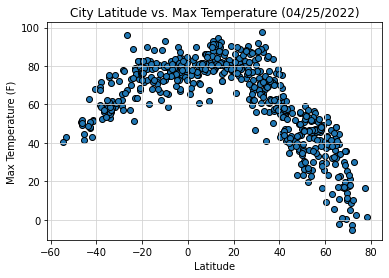

In [11]:
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], edgecolor = "black")
plt.title("City Latitude vs. Max Temperature (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-", color="lightgrey")
plt.savefig("../output_data/Latitude vs. Temperature Plot.png")
plt.show()

## Latitude vs. Humidity Plot

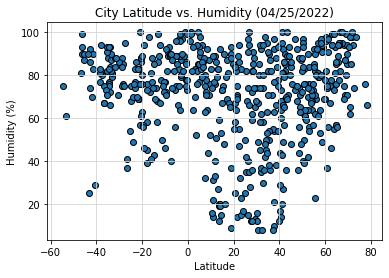

In [12]:
plt.scatter(weather_df["Lat"],weather_df["Humidity"],edgecolor = "black")
plt.title("City Latitude vs. Humidity (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Latitude vs. Humidity Plot.png")
plt.show()

## Latitude vs. Cloudiness Plot

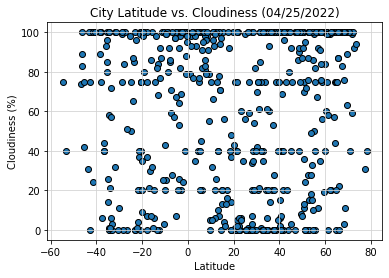

In [13]:
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"],edgecolor = "black")
plt.title("City Latitude vs. Cloudiness (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Latitude vs. Cloudiness Plot.png")
plt.show()

## Latitude vs. Wind Speed Plot

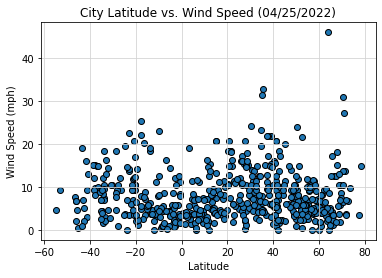

In [14]:
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"],edgecolor = "black")
plt.title("City Latitude vs. Wind Speed (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("../output_data/Latitude vs. Wind Speed Plot.png")
plt.show()

## Linear Regression

In [15]:
# create data frame for northern hemisphere cities 
north_hem = weather_df[weather_df["Lat"]>0]
north_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,kapaa,22.0752,-159.3190,78.78,89,100,14.97,US,1651004207
2,saskylakh,71.9167,114.0833,-2.56,98,99,3.67,RU,1651004207
4,pasighat,28.0667,95.3333,69.12,72,34,4.45,IN,1651004208
5,tuktoyaktuk,69.4541,-133.0374,14.00,85,100,5.75,CA,1651004208
10,iqaluit,63.7506,-68.5145,5.70,55,57,2.10,CA,1651004209
...,...,...,...,...,...,...,...,...,...
550,englewood,39.6478,-104.9878,75.92,12,75,5.99,US,1651004369
551,bogorodskoye,56.5500,37.8833,41.59,92,67,4.88,RU,1651004369
554,vinh,18.6667,105.6667,78.40,88,37,3.96,VN,1651004208
555,paris,48.8534,2.3488,56.10,63,75,9.22,FR,1651004171


In [16]:
# dataframe for southern hemisphere cities 
south_hem = weather_df[weather_df["Lat"]<0]
south_hem

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,luderitz,-26.6481,15.1594,67.32,41,0,9.19,NA,1651004206
3,vila velha,-20.3297,-40.2925,82.35,86,40,9.22,BR,1651004119
6,arraial do cabo,-22.9661,-42.0278,78.76,83,0,13.80,BR,1651004208
7,castro,-24.7911,-50.0119,73.15,75,50,3.78,BR,1651004209
8,waipawa,-41.4122,175.5153,51.87,83,24,3.00,NZ,1651004209
...,...,...,...,...,...,...,...,...,...
546,katherine,-14.4667,132.2667,79.12,69,75,5.75,AU,1651004368
547,mirabela,-16.2628,-44.1644,81.14,41,7,7.67,BR,1651004368
552,ahipara,-35.1667,173.1667,62.53,71,96,6.98,NZ,1651004370
553,tres arroyos,-38.3739,-60.2798,67.55,83,89,12.08,AR,1651004370


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7505111230880684


<function matplotlib.pyplot.show(close=None, block=None)>

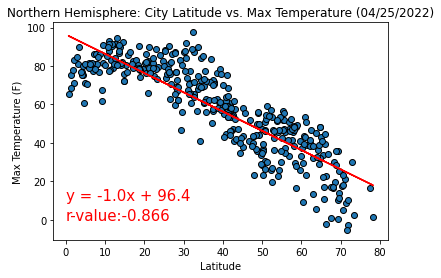

In [17]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Max Temp"])
regress_values = north_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(north_hem["Lat"],north_hem["Max Temp"], edgecolor = "black")

# draw our regression line
plt.plot(north_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(0,10),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(0,0), fontsize = 15, color = "red")
#labeling 
plt.title("Northern Hemisphere: City Latitude vs. Max Temperature (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs. Max Temperature Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5536409856616168


<function matplotlib.pyplot.show(close=None, block=None)>

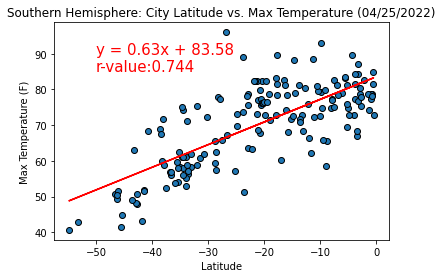

In [18]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Max Temp"])
regress_values = south_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(south_hem["Lat"],south_hem["Max Temp"],edgecolor = "black")

# draw our regression line
plt.plot(south_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(-50,85), fontsize = 15, color = "red")
#labeling 
plt.title("Southern Hemisphere: City Latitude vs. Max Temperature (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs. Max Temperature Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04469201428720653


<function matplotlib.pyplot.show(close=None, block=None)>

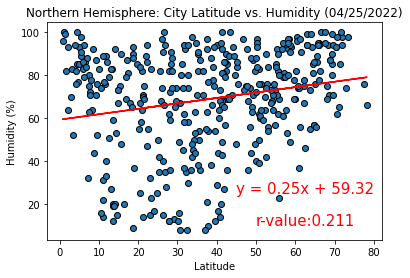

In [29]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Humidity"])
regress_values = north_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(north_hem["Lat"],north_hem["Humidity"], edgecolor = "black")

# draw our regression line
plt.plot(north_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(45,25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(50,10), fontsize = 15, color = "red")
#labeling 
plt.title("Northern Hemisphere: City Latitude vs. Humidity (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs. Humidity Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.002344748556650151


<function matplotlib.pyplot.show(close=None, block=None)>

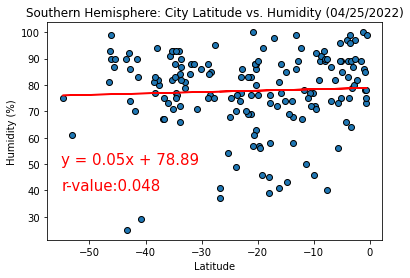

In [30]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Humidity"])
regress_values = south_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(south_hem["Lat"],south_hem["Humidity"], edgecolor = "black")

# draw our regression line
plt.plot(south_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(-55,40), fontsize = 15, color = "red")
#labeling 
plt.title("Southern Hemisphere: City Latitude vs. Humidity (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs. Humidity Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02256415265797837


<function matplotlib.pyplot.show(close=None, block=None)>

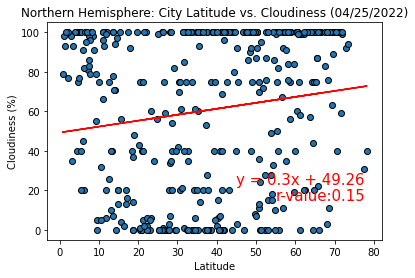

In [35]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Cloudiness"])
regress_values = north_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(north_hem["Lat"],north_hem["Cloudiness"], edgecolor = "black")

# draw our regression line
plt.plot(north_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(45,23),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(55,15), fontsize = 15, color = "red")
#labeling 
plt.title("Northern Hemisphere: City Latitude vs. Cloudiness (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs. Cloudiness Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.014374082621885623


<function matplotlib.pyplot.show(close=None, block=None)>

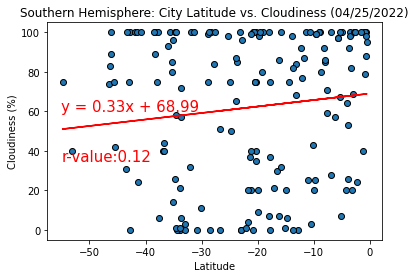

In [37]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Cloudiness"])
regress_values = south_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(south_hem["Lat"],south_hem["Cloudiness"], edgecolor = "black")

# draw our regression line
plt.plot(south_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(-55,60),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(-55,35), fontsize = 15, color = "red")
#labeling 
plt.title("Southern Hemisphere: City Latitude vs. Cloudiness (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs. Cloudiness Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0007675092512465308


<function matplotlib.pyplot.show(close=None, block=None)>

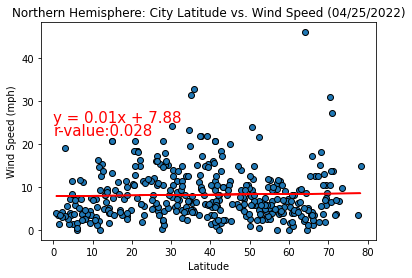

In [38]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_hem["Lat"],north_hem["Wind Speed"])
regress_values = north_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(north_hem["Lat"],north_hem["Wind Speed"], edgecolor = "black")

# draw our regression line
plt.plot(north_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(0,25),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(0,22), fontsize = 15, color = "red")
#labeling 
plt.title("Northern Hemisphere: City Latitude vs. Wind Speed (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Northern Hemisphere City Latitude vs. Wind Speed Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03296947571042733


<function matplotlib.pyplot.show(close=None, block=None)>

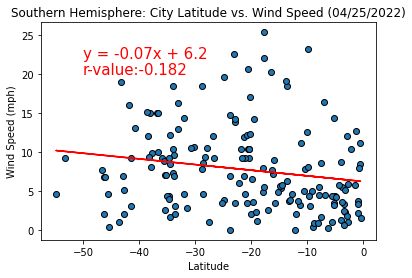

In [40]:
# using linregress from scipy.stats
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_hem["Lat"],south_hem["Wind Speed"])
regress_values = south_hem["Lat"] * slope + intercept

# making a text version of our equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# draw initial scatter
plt.scatter(south_hem["Lat"],south_hem["Wind Speed"], edgecolor = "black")

# draw our regression line
plt.plot(south_hem["Lat"],regress_values,"r-")

# annotate on our figure the line equation in red
plt.annotate(line_eq,(-50,22),fontsize=15,color="red")
plt.annotate(f'r-value:{round(rvalue,3)}',(-50,20), fontsize = 15, color = "red")
#labeling 
plt.title("Southern Hemisphere: City Latitude vs. Wind Speed (04/25/2022)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/Southern Hemisphere City Latitude vs. Wind Speed Plot.png")
print(f"The r-squared is: {rvalue**2}")
plt.show